# **Project 1: The Power Method for Symmetric Eigenproblems**
## Math 537: Introduction to Scientific Computing and Problem Solving
# Name: Sanaz Hami Hassan Kiyadeh , shkiyadeh@crimson.ua.edu
Due Tuesday October 25, 2022 at 5pm

# Background

## The Symmetric Eigenproblem

A matrix $A$ is symmetric if it is equal to its transpose: $A = A^T$. One nice properties of symmetric matrices is that they have real eigenvalues. More precisely, for any $n\times n$ symmetric matrix $A$, there are $n$ linearly independent eigenvectors $u_1, u_2, \dots, u_n$ and corresponding eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_n$ such that 
$$
  A u_i = \lambda u_i
$$
for all $i = 1,2,\dots, n$.
In fact, we can assume that these eigenvectors are *orthonormal*:
$$
  u_i^T u_j = 
  \begin{cases}
    1, & \text{if } i = j, \\
    0, & \text{if } i \neq j.
  \end{cases}
$$

## The Power Method



### Motivation

Suppose that we can order the eigenvalues of symmetric $A$ in decreasing order by magnitude and that the largest magnitude eigenvalue is unique:
$$
  |\lambda_1| > |\lambda_2| \ge |\lambda_3 | \ge \cdots \ge |\lambda_n|.
$$

Let's take a closer look at the product $A x$ for an arbitrary $x \in \mathbb{R}^n$. Since the eigenvectors are independent/orthonormal, we can use them to form a basis for $\mathbb{R}^n$:
$$
  x = a_1 u_1 + a_2 u_2 + \cdots a_n u_n
$$
for some $a \in \mathbb{R}^n$.
It follows that
$$
  Ax = A(a_1 u_1 + a_2 u_2 + \cdots a_n u_n)
  = a_1 (\lambda_1 u_1) + a_2 (\lambda_2 u_2) + \cdots + a_n (\lambda_n u_n).
$$
Multiplying again on the left by $A$ gives
$$
  A^2 x = A \Big(a_1 (\lambda_1 u_1) + a_2 (\lambda_2 u_2) + \cdots + a_n (\lambda_n u_n) \Big)
  = a_1 \lambda_1^2 u_1 + a_2 \lambda_2^2 u_2 + \cdots + a_n \lambda_n^2 u_n.
$$
In general,
$$
  A^k x = a_1 \lambda_1^k u_1 + a_2 \lambda_2^k u_2 + \cdots + a_n \lambda_n^k u_n
  = \lambda_1^k \left( a_1 u_1 + a_2 \frac{\lambda_2^k}{\lambda_1^k} u_2 + \cdots + a_n \frac{\lambda_n^k}{\lambda_1^k} u_n \right).
$$
Taking the limit as $k \rightarrow \infty$, we have 
$$
  \frac{\lambda_i^k}{\lambda_1^k} \rightarrow 0 \hspace{0.25in} \text{and}
  \hspace{0.25in}
  A^k x \rightarrow u_1.
$$
This implies that if we repeatedly multiply $x$ by $A$, then the result converges to the *dominant* or *leading eigenvector* $u_1$. 
Moreover, since
$$
  \lambda_1 (A^k x) \rightarrow \lambda_1 u_1,
$$
we can obtain an approximate eigenvalue $r$, tending to $\lambda_1$, by the formula
$$
  r = \frac{[A^k x]_1}{[A^{k-1} x]_1},
$$
where $[A^k x]_1$ denotes the first entry of the vector $A^k x$; here, the result is true for any index.

### Pseudocode

The above motivation suggests the following algorithm, called the **Power Method**:

**Input:** symmetric matrix **A**, initial vector **x**, maximum number of iterations **maxits**, stopping tolerance **tol**.

**Output:** number of iterations performed **k**, approximate dominant eigenvector **x**, approximate dominant eigenvalue **r**.

**The Algorithm:**

while not converged and $k \le \textbf{maxits}$:
*   Update product $y = A x$
*   Update approximate eigenvalue $r_k = y_1/x_1$.
* Update/normalize $x = y/\|y\|_\infty$
* Check for convergence (stop if $r_k$ has converged):
$$
  \frac{|r_k - r_{k-1}|}{|r_k|} < \textbf{tol}.
$$


Here, $\|y\|_\infty$ is the max-norm or infinity norm of $y$ given by 
$$
  \|y\|_\infty = \max_{i=1,2,\dots, n} |y_i|.
$$






### Aitken Acceleration

The sequence of iterates tending to the dominant eigenvector $u_1$ generated by the Power Method tends to converge more quickly than the sequence of the eigenvalue iterates $\{r_i\}$. 

*Aitken Acceleration* is used to speed up the convergence of the eigenvalues, by using the following formula as the approximation of $\lambda_1$ each iteration:
\begin{align*}
    s_k &= r_k, && k = 0, 1, 2 \\
    s_k &= r_k - \frac{(r_k - r_{k-1})^2}{r_k - 2 r_{k-1} + r_{k-2}}, && k \ge 3
\end{align*} 

This yields the following (modified) Power Method:

while not converged and $k \le \textbf{maxits}$:
*   Update product $y = A x$
*   Update approximate eigenvalue $r_k = y_1/x_1$.
* Calculate $s_k$.
* Update/normalize $x = y/\|y\|_\infty$
* Check for convergence (stop if $s_k$ has converged):
$$
  \frac{|s_k - s_{k-1}|}{|s_k|} < \textbf{tol}.
$$

Note that this algorithm is the original Power Method with an additional step used to calculate $s_k$ and with stopping condition involving $s_k$ to determine if the sequence has converged.

Review the [Aitken acceleration](https://en.wikipedia.org/wiki/Aitken%27s_delta-squared_process) wiki for more details.


# The Assignment

## Part 1: Implementing the Power Method

Make Python functions for performing the Power Method: 

1.   one using the code written in class for matrix multiplication.
2.   one using the matrix multiplication function in Numpy (**matmul**)

Your function should take matrix $A$, initial vector $x$, maximum number of iterations, and stopping tolerance and perform the steps of the pseudocode given above.
The functions should return the number of iterations performed ($k$), the approximate dominant eigenvector, and a vector of iterates of the approximate eigenvalues $r = (r_1, r_2, \dots, r_k)$ (You'll need to add some additional code/syntax for updating the counter $k$, initializing $r$, etc.)


### Hints

* You will need to initialize an array of appropriate size to store $r$ (e.g., using the **np.zeros** function). When the sequence of iterates has converged, you should discard any entries of the array that haven't been changed from $0$.
* You should use an if statement do check for convergence. I suggest initializing a conditional variable and use its value to determine whether to continue the loop. You will also need to be careful to only check the convergence condition for $k \ge 1$.
* You can modify the code we used for matrix multiplication using nested lists.

### Solution

In [1]:
#the function returns the multiplication of an n*n matrix by an n*1 vector
import numpy as np
def matvecmul(A,x):
  n=len(x)
  prod=np.zeros(n)
  for i in range(n):
    sum=0
    for j in range(n):
      sum+=A[i][j]*x[j]
    prod[i]=sum  
  return prod

In [2]:
def Powermethod1(A,x,maxits,tol):
  k=0 #iteration counter 
  r=[]
  err=1
  while k<maxits and err>tol:
    y=matvecmul(A,x)
    r_new=y[0]/x[0]
    x=y/max(np.abs(y))
    r.append(r_new)
    if k>0:
      err=np.abs(r_new-r[k-1])/np.abs(r_new)
    k+=1  
  return k, x,r ,err   




In [3]:
#testin our function
A=[[1,2],[3,4]]
x=[1,2]
Powermethod1(A,x,10,1e-5)

(6,
 array([0.45742711, 1.        ]),
 [5.0,
  5.4,
  5.37037037037037,
  5.372413793103448,
  5.37227214377407,
  5.372281959378733],
 1.8270829300298155e-06)

In [4]:
def Powermethod2(A,x,maxits,tol):
  k=0 #iteration counter 
  r=[]
  err=1
  while k<maxits and err>tol:
    y=np.matmul(A,x)
    r_new=y[0]/x[0]
    x=y/max(np.abs(y))
    r.append(r_new)
    if k>0:
      err=np.abs(r_new-r[k-1])/np.abs(r_new)
    k+=1  
  return k, x,r ,err   

In [5]:
#testing our function
A=[[1,2],[3,4]]
x=[1,2]
Powermethod2(A,x,10,1e-5)

(6,
 array([0.45742711, 1.        ]),
 [5.0,
  5.4,
  5.37037037037037,
  5.372413793103448,
  5.37227214377407,
  5.372281959378733],
 1.8270829300298155e-06)

## Part 2: Implementing the Aitken Acceleration Formula

Write a Python function implementing the Power Method with the Aitken acceleration formula. Your function should behave similarly to that for the first version of the Power Method but with an array **s** of approximate eigenvalues given by the acceleration formula.

### Hints

* You'll need to modify one of your functions from the previous part to include updates of $s$. I suggest the version using the **matmul** function.
* You'll need to use a conditional to determine which update formula to use for $s_k$ depending on the value of $k$.

### Solution



In [6]:
def AitkenPM(A,x,maxits,tol):
  k=0 #iteration counter 
  r=[]
  s=[]
  err=1
  while k<maxits and err>tol:
    if k==0:
      y=np.matmul(A,x)
      r_new=y[0]/x[0]
      x=y/max(np.abs(y))
      r.append(r_new)
      s.append(r_new)
    elif k>0 and k<=3:
      y=np.matmul(A,x)
      r_new=y[0]/x[0]
      x=y/max(np.abs(y))
      r.append(r_new)
      s.append(r_new)
      err=np.abs(r_new-r[k-1])/np.abs(r_new)
    else:
      y=np.matmul(A,x)
      r_new=y[0]/x[0]
      x=y/max(np.abs(y))
      r.append(r_new)  
      s_new=r_new- ((r_new-r[k-1])**2/(r_new-2*r[k-1]+r[k-2]))
      s.append(s_new)
      err=np.abs(s_new-s[k-1])/np.abs(s_new)
    k+=1  
  return k, x,r ,err 



## Part 3: Testing the Functions



### Plotting Convergence

Consider the matrix $A$ and vector $x$ given by
$$
  A =  \left(
    \begin{matrix}
      100 & 1 & -1 \\ 1 & 99 & 2 \\ -1 & 2 & 98
    \end{matrix}
    \right)
    \hspace{0.25in}
  x = \left(
    \begin{matrix} 
    2 \\ 3 \\ 1
    \end{matrix}
    \right).
$$
* Use each of the three functions written in Parts 1 and 2 to use the Power Method to find the dominant eigenpair of $A$. Use the given vector $x$ as initial solution.
* Use maximum number of iterations equal to $5000$ and stopping tolerance $10^{-12}$. 
* Report the eigenvalue $\lambda_1$ found by each of the three functions to 15 decimal places using **%1.15f**.
* Plot the sequence of approximate eigenvalues generated by each function, and comment on the behavior of the sequences of iterates. You should use a log-log scale for your plot.



In [7]:
A=[[100,1,-1],[1,99,2],[-1,2,98]]
x=[2,3,1]
tol=1e-12
maxits=5000
k1,x1,r1,err1=Powermethod1(A,x,maxits,tol)
print(k1,x1,r1[k1-1]) #printing the number or iterations, eigenvector and the eigen value

3852 [0.80193764 1.         0.44504191] 100.69202150177114


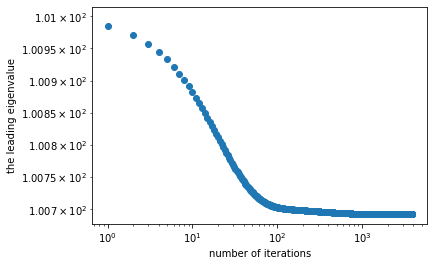

In [8]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = range(k1)
ypoints = r1
plt.xscale("log")
plt.yscale("log")
plt.xlabel("number of iterations")
plt.ylabel("the leading eigenvalue")
plt.plot(xpoints, ypoints, 'o')
plt.show()

In [9]:
A=[[100,1,-1],[1,99,2],[-1,2,98]]
x=[2,3,1]
tol=1e-12
maxits=5000
k2,x2,r2,err2=Powermethod2(A,x,maxits,tol)
print(k2,x2,r2[k2-1]) #printing the number or iterations, eigenvector and the eigen value

3852 [0.80193764 1.         0.44504191] 100.69202150177114


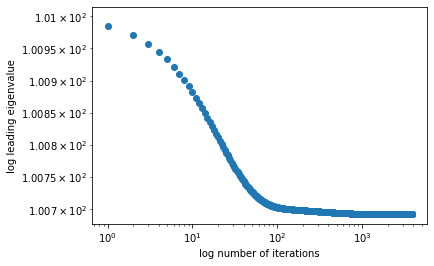

In [10]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = range(k2)
ypoints = r2
plt.xscale("log")
plt.yscale("log")
plt.xlabel("log number of iterations")
plt.ylabel("log leading eigenvalue")
plt.plot(xpoints, ypoints, 'o')
plt.show()

In [11]:
A=[[100,1,-1],[1,99,2],[-1,2,98]]
x=[2,3,1]
tol=1e-12
maxits=5000
k3,x3,s,err3=AitkenPM(A,x,maxits,tol)
print(k3,x3,s[k3-1]) #printing the number or iterations, eigenvector and the eigen value

860 [0.79984445 1.         0.44597347] 100.69267000908059


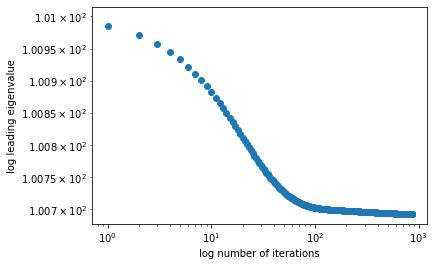

In [12]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = range(k3)
ypoints = s
plt.xscale("log")
plt.yscale("log")
plt.xlabel("log number of iterations")
plt.ylabel("log leading eigenvalue")
plt.plot(xpoints, ypoints, 'o')
plt.show()

#### Solution
.

### Plotting Run-Times

For each of $n = 2, 4, 8, \dots, 2048$, perform the following $25$ times:

* Generate a random $n\times n$ symmetric matrix $A$ and random $n$-dimensional vector using the **rand** function from Numpy.
* Find the dominant eigenpair of $A$ using the Power Method starting with initial vector $x$. Use each of the Power Methods implemented in Parts 1 and 2.
* Record the run-time and number of iterations performed for each method.

After performing the Power Method on each of the random matrices for each $n$, calculate the average run-time and number of iterations.
Then plot these averages as a function of $n$ using a log-log scale.

#### Hints

* You will need to make a $13\times 25$ matrix to store the run-time and iteration count for each test; here, rows corresponding to the different values of $n$ and columns correspond to the $25$ repetitions. You can initialize this matrix as an $m\times n$ all-zeros matrix using  **np.zeros((m,n))**.
* You can make an $m\times n$ matrix $B$ with entries randomly sampled from the uniform distribution using **np.random.rand(m,n)**. You can then get a random *symmetric* matrix using $A = B + B^T$; you can use **np.transpose(B)** to take the transpose of the matrix $B$.
* You should use the function **perf_counter** to record run-times for each method.
* You can calculate the average entry in each row of an array $M$ using the command **np.mean(M, 1)** and each column using **np.mean(M, 0)**.
* Be patient while running this experiment. It may take several minutes to complete.

#### Solution



In [13]:
import numpy as np
#generation random symmetric matrix and vector
def gen(n):
  x=np.random.rand(n)
  B=np.random.rand(n,n)
  A=B+np.transpose(B)
  return A,x


In [14]:
#data matrix
#iteration matrix
Mit1=np.zeros((11,25))
#run time matrix
Mrun1=np.zeros((11,25))


In [15]:
tol=1e-12
maxits=5000
from time import perf_counter
for i in range(1,12):
  n=2**i
  for j in range(25):
    A,x=gen(n)
    t_start = perf_counter()
    k,_,_,_=Powermethod1(A,x,maxits,tol)
    t_stop = perf_counter()
    Mit1[i-1][j]=k
    Mrun1[i-1][j]=t_stop-t_start

In [16]:
#plot prepration 
n_vec=[]
for i in range(1,12):
  n=2**i
  n_vec.append(n)

it_vec1=np.mean(Mit1,1)
time_vec1=np.mean(Mrun1,1)


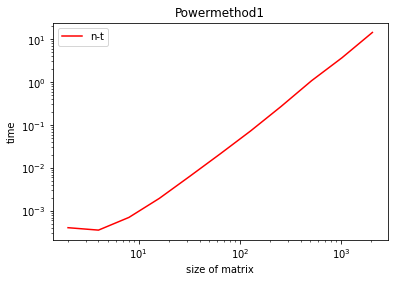

In [17]:
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(n_vec,time_vec1, color="r", label="n-t")
plt.xlabel("size of matrix")
plt.ylabel("time")
plt.title("Powermethod1")
plt.legend()
plt.show()


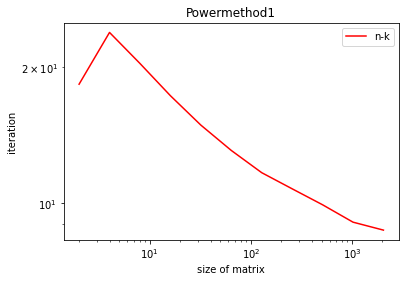

In [18]:
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(n_vec,it_vec1, color="r", label="n-k")
plt.xlabel("size of matrix")
plt.ylabel("iteration")
plt.title("Powermethod1")
plt.legend()
plt.show()

In [19]:
#data matrix
#iteration matrix
Mit2=np.zeros((11,25))
#run time matrix
Mrun2=np.zeros((11,25))

In [20]:
tol=1e-12
maxits=5000
from time import perf_counter
for i in range(1,12):
  n=2**i
  for j in range(25):
    A,x=gen(n)
    t_start = perf_counter()
    k,_,_,_=Powermethod2(A,x,maxits,tol)
    t_stop = perf_counter()
    Mit2[i-1][j]=k
    Mrun2[i-1][j]=t_stop-t_start

In [21]:
#plot prepration 


it_vec2=np.mean(Mit2,1)
time_vec2=np.mean(Mrun2,1)

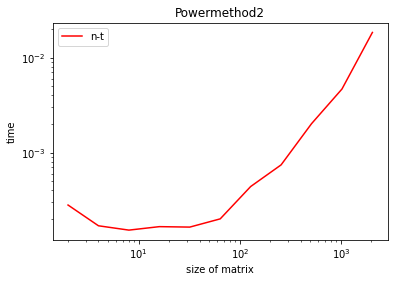

In [22]:
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(n_vec,time_vec2, color="r", label="n-t")
plt.xlabel("size of matrix")
plt.ylabel("time")
plt.title("Powermethod2")
plt.legend()
plt.show()

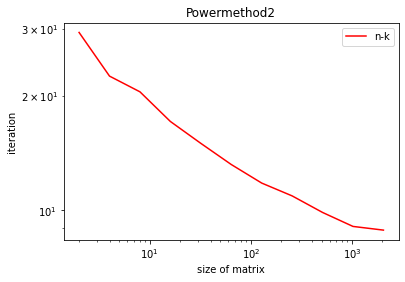

In [23]:
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(n_vec,it_vec2, color="r", label="n-k")
plt.xlabel("size of matrix")
plt.ylabel("iteration")
plt.title("Powermethod2")
plt.legend()
plt.show()

In [24]:
#data matrix
#iteration matrix
Mit3=np.zeros((11,25))
#run time matrix
Mrun3=np.zeros((11,25))

In [27]:
tol=1e-12
maxits=5000
from time import perf_counter
for i in range(1,12):
  n=2**i
  for j in range(25):
    A,x=gen(n)
    t_start = perf_counter()
    k,_,_,_=AitkenPM(A,x,maxits,tol)
    t_stop = perf_counter()
    Mit3[i-1][j]=k
    Mrun3[i-1][j]=t_stop-t_start

In [28]:


it_vec3=np.mean(Mit3,1)
time_vec3=np.mean(Mrun3,1)

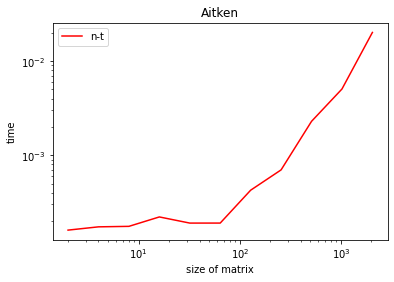

In [29]:
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(n_vec,time_vec3, color="r", label="n-t")
plt.xlabel("size of matrix")
plt.ylabel("time")
plt.title("Aitken")
plt.legend()
plt.show()

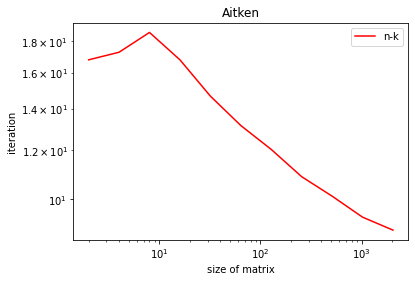

In [30]:
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(n_vec,it_vec3, color="r", label="n-k")
plt.xlabel("size of matrix")
plt.ylabel("iteration")
plt.title("Aitken")
plt.legend()
plt.show()

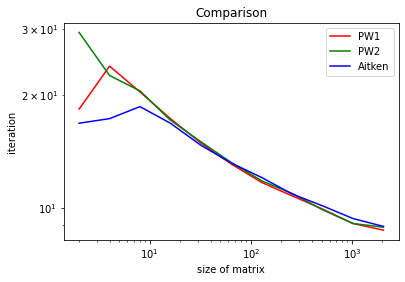

In [31]:
#iteration comparison 
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(n_vec,it_vec1, color="r", label="PW1")
plt.plot(n_vec,it_vec2, color="g", label="PW2")
plt.plot(n_vec,it_vec3, color="b", label="Aitken")
plt.xlabel("size of matrix")
plt.ylabel("iteration")
plt.title("Comparison")
plt.legend()
plt.show()


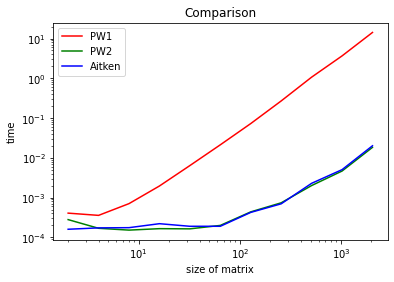

In [32]:
#time comparison 
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(n_vec,time_vec1, color="r", label="PW1")
plt.plot(n_vec,time_vec2, color="g", label="PW2")
plt.plot(n_vec,time_vec3, color="b", label="Aitken")
plt.xlabel("size of matrix")
plt.ylabel("time")
plt.title("Comparison")
plt.legend()
plt.show()

### Solving Linear Differential Equations

#### Background 

A paired **linear differential equation** with two dependent variables $x_1$ and $x_2$ has the form 
\begin{align*}
  x_1' &= a_{11} x_1 + a_{12} x_2 \\ 
  x_2' &= a_{21} x_1 + a_{22} x_2.
\end{align*}
We can generalize this to model a **system of $n$ linear first-order differential equations**:
$$
  x' = A x,
$$
where $A$ is an $n\times n$ matrix, and  the vector $x$ has $n$ entries, each of which is a function of $t$.

A solution of this system is given by 
$$
  x(t) = e^{\lambda t} u
$$
where $\lambda$ is an eigenvalue of $A$ with corresponding eigenvector $u$.
Indeed, taking the derivative of the proposed form of $x$, we have 
$$
  x' = \lambda e^{\lambda t} u = e^{\lambda t} (\lambda u) = A e^{\lambda t} u = A x.
$$
Thus, we can associate a solution of the linear differential equation with each eigenpair of $A$.





#### Assignment 

Use the Power Method to find a solution of the system of linear differential equations $x' = Ax$, where 
$$
  A = \left(
    \begin{matrix} 
    -2 & 1 & 0 & 1 \\ 1 & -2 & 1 & 0 \\ 0 & 1 & -2 & 1 \\ 1 & 0 & 1 & -2
    \end{matrix}
    \right)
$$

Use the results of the previous parts to inform your choice of function, initial vector, stopping criteria.

#### Solution



In [33]:
A=[[-2,1,0,1],[1, -2,1,0],[0,1,-2,1],[1,0,1,-2]]  #defining A
x=np.random.rand(4) #initial guess
k1,x1,r1,err1=Powermethod2(A,x,maxits,tol)
print(k1,x1,"%1.6f" %r1[k1-1])


41 [ 1. -1.  1. -1.] -4.000000


We obtain one solution from the given linear system by Powermethod2 with the random initial guess and the stopping criteria tol=1e-12, maxits=5000

$$ x(t)=\begin{pmatrix}-e^{-4t}\\e^{-4t}\\-e^{-4t}\\e^{-4t} \end{pmatrix}$$